# Data Preprocessing and Feature Engineering Part 1

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None)

We have already looked into this data before and we utilize the following data types to make the data size smaller and easier to use in jupyter notebooks. Previously all the categorical variables were in object format and all day values d1 - d1941 were int64. This was changed to category data type for categorical variables and float32 for d_* variables. Research was done with Kaggle notebooks and online queries and int 64 values make the memory usage twice as much as when using float32. Why we didnt go lower to float16 data type was that we found out online that even though it reduced memory usage the backend in jupyter notebook would actually perform slower than float32 due it not supporting float16 computation.

In [4]:
sales_dtypes = {'id': 'category', 'item_id': 'category', 'dept_id': 'category', 'cat_id': 'category', 
                'store_id': 'category', 'state_id': 'category', **{f'd_{i}': np.float32 for i in range(1942)}}

data = pd.read_csv("sales_train_evaluation.csv", dtype=sales_dtypes)

In [5]:
data

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  \
0         CA_1       CA  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1         CA_1       CA  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2         CA_1       CA  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
3         CA_1       CA  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
4         CA_1       CA  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
...        ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
30485     WI_3       WI  0.0  0.0  2.0  2.0  0.0  3.0  1.0  4.0  1.0   0.0   
30486     WI_3       WI  0.0  0.0  0.0  0.0  0.0  5.0  0.0  1.0  1.0   3.0   
30487     WI_3       WI  0.0  6.0  0.0  2.0  2.0  4.0  1.0  8.0  5.0   2.0   
30488     WI_3       WI  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
30489     WI_3       WI  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

       d_11  d_12  d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
30485   0.0   3.0   4.0   4.0   0.0   0.0   1.0   0.0   1.0   1.0   7.0   7.0   
30486   1.0   1.0   0.0   4.0   2.0   0.0   1.0   2.0   1.0   1.0   0.0   0.0   
30487   7.0   5.0   3.0   5.0  20.0   8.0  10.0   3.0   3.0   4.0   7.0   2.0   
30488   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
30489   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       d_23  d_24  d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
30485   3.0   6.0   3.0   3.0   7.0  12.0   4.0   2.0   7.0   5.0  12.0   5.0   
30486   0.0   0.0   3.0   1.0   1.0   1.0   2.0   0.0   1.0   0.0   1.0   1.0   
30487   3.0   5.0   6.0   3.0   4.0   1.0   2.0   5.0   1.0   2.0   2.0   2.0   
30488   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
30489   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       d_35  d_36  d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: category(6), float32(1941)
memory usage: 227.3 MB


In [8]:
data["store_id"].value_counts()

CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: store_id, dtype: int64

We utilize the same kind data typing process before data read of the calendar dataset. We use int16 for a couple of these columns after researching many different Kaggle notebooks and looking at data compression best practices in those notebooks

In [9]:
caldtypes = {"event_name_1": "category", "event_name_2": "category", "event_type_1": "category",
                  "event_type_2": "category", "weekday": "category", 'wm_yr_wk': 'int16', "wday": "int16",
                  "month": "int16", "year": "int16", "snap_CA": "float32", 'snap_TX': 'float32', 'snap_WI': 'float32' }

cal = pd.read_csv("calendar.csv", dtype = caldtypes)

#Convert date column to datetime format
cal["date"] = pd.to_datetime(cal["date"])

In [10]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int16         
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   int16         
 4   month         1969 non-null   int16         
 5   year          1969 non-null   int16         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    category      
 8   event_type_1  162 non-null    category      
 9   event_name_2  5 non-null      category      
 10  event_type_2  5 non-null      category      
 11  snap_CA       1969 non-null   float32       
 12  snap_TX       1969 non-null   float32       
 13  snap_WI       1969 non-null   float32       
dtypes: category(5), datetime64[ns](1), float32(3), int16(4), object(1)
memory usage: 81.0+ K

In [11]:
cal

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1.0,1.0,0.0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0.0,1.0,1.0
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0.0,0.0,0.0


For the purposes of our analysis we need to melt the data from the wide format with each day as a column and change it to where the day is one column and each of those columns in the wide format is a category in this new long format column.

In [12]:
# Get a list of all days column names in the data table
day_list = data.columns.values.tolist()[6:]

# Wide to long format
long_data = pd.melt(id_vars = ["id","item_id", "dept_id","cat_id","store_id","state_id"], value_vars = day_list, var_name = "d", 
             value_name = "sales_units", frame = data)

In [13]:
long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           category
 1   item_id      category
 2   dept_id      category
 3   cat_id       category
 4   store_id     category
 5   state_id     category
 6   d            object  
 7   sales_units  float32 
dtypes: category(6), float32(1), object(1)
memory usage: 1.1+ GB


In [14]:
long_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales_units
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1.0
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0.0
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2.0
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0.0


Now we want to get all the calendar variables in our base dataset. We do this by merging on the "d" column for both datasets. 

In [15]:
long_data_cal = long_data.merge(cal, on="d")
long_data_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 59181089
Data columns (total 21 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             object        
 7   sales_units   float32       
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       category      
 11  wday          int16         
 12  month         int16         
 13  year          int16         
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       float32       
 19  snap_TX       float32       
 20  snap_WI       float32       
dtypes: category(11), datetime64[ns](1), float32(4), int16(4), object(1)
memory usage: 3.4+ GB


In [79]:
long_data_cal["day_of_month"] = pd.DatetimeIndex(long_data_cal['date']).day

In [80]:
long_data_cal.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales_units,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day_of_month
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0.0,0.0,0.0,29
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0.0,0.0,0.0,29
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0.0,0.0,0.0,29
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0.0,0.0,0.0,29
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0.0,0.0,0.0,29


For the purposes of our analysis we will be creating a model for each of the store_id's so we split up the data into those subsets and save them to csv files for later read ins

In [48]:
# DONT RUN
#ca_1 = long_data_cal[long_data_cal["store_id"] == "CA_1"]
#ca_2 = long_data_cal[long_data_cal["store_id"] == "CA_2"]
#ca_3 = long_data_cal[long_data_cal["store_id"] == "CA_3"]
#ca_4 = long_data_cal[long_data_cal["store_id"] == "CA_4"]
#tx_1 = long_data_cal[long_data_cal["store_id"] == "TX_1"]
#tx_2 = long_data_cal[long_data_cal["store_id"] == "TX_2"]
#tx_3 = long_data_cal[long_data_cal["store_id"] == "TX_3"]
#wi_1 = long_data_cal[long_data_cal["store_id"] == "WI_1"]
#wi_2 = long_data_cal[long_data_cal["store_id"] == "WI_2"]
#wi_3 = long_data_cal[long_data_cal["store_id"] == "WI_3"]

In [50]:
#ca_1.to_csv('ca_1.csv')
#ca_2.to_csv('ca_2.csv')
#ca_3.to_csv('ca_3.csv')
#ca_4.to_csv('ca_4.csv')
#tx_1.to_csv('tx_1.csv')
#tx_2.to_csv('tx_2.csv')
#tx_3.to_csv('tx_3.csv')
#wi_1.to_csv('wi_1.csv')
#wi_2.to_csv('wi_2.csv')
#wi_3.to_csv('wi_3.csv')

# Exploratory Data Analysis

For creating our features for each of these models we have to create some holiday features that are most prevalent across all stores so we look at the top sales on the day of those holidays and choose top 5 holidays. We find that SuperBowl, Pesach End, Mother's Day, Purim End, and Labor Day have the most sales on that event day so well will use these features in later feature engineering sections

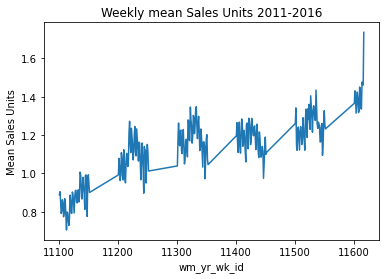

In [100]:
#We will now look at sales trends on a weekly basis
plt.title("Weekly mean Sales Units 2011-2016")
plt.ylabel("Mean Sales Units")
plt.xlabel("wm_yr_wk_id")
plt.plot(long_data_cal.groupby('wm_yr_wk')["sales_units"].mean())
plt.show()

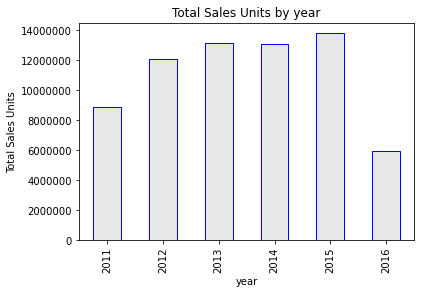

In [30]:
#Taking a look at year sales trends
f= plt.figure()
plt.ticklabel_format(style = 'plain')
long_data_cal.groupby('year')["sales_units"].sum().plot(kind="bar",color=(0.1, 0.1, 0.1, 0.1), edgecolor='blue',ylabel="Total Sales Units")
plt.title("Total Sales Units by year")
plt.show()
#The sales for 2016 are low because we have only data for the first few months for 2016

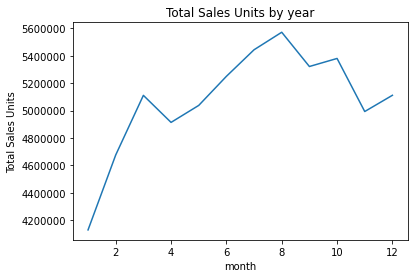

In [114]:
#Taking a look at monthly sales trends
long_data_cal_subset = long_data_cal[~(long_data_cal["year"]==2016)]
f= plt.figure()
plt.ticklabel_format(style = 'plain')
long_data_cal_subset.groupby('month')["sales_units"].sum().plot(ylabel="Total Sales Units")
plt.title("Total Sales Units by year")
plt.show()

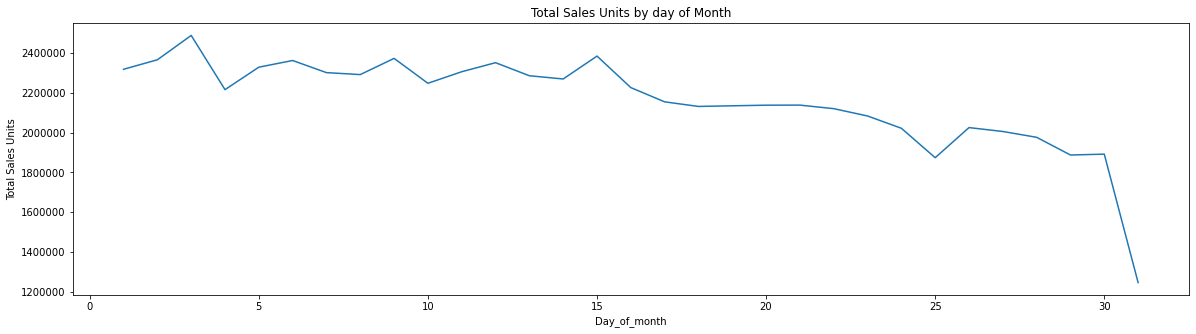

In [89]:
#Sales on an average monthly basis
plt.figure(figsize = (20,5))
plt.title("Total Sales Units by day of Month")
plt.ylabel("Total Sales Units")
plt.ticklabel_format(style = 'plain')
long_data_cal.groupby('day_of_month')["sales_units"].sum().plot()
plt.xlabel("Day_of_month")
plt.show()

In [32]:
CA_long = long_data_cal[long_data_cal['state_id']=="CA"]
WI_long = long_data_cal[long_data_cal['state_id']=="WI"]
TX_long = long_data_cal[long_data_cal['state_id']=="TX"]

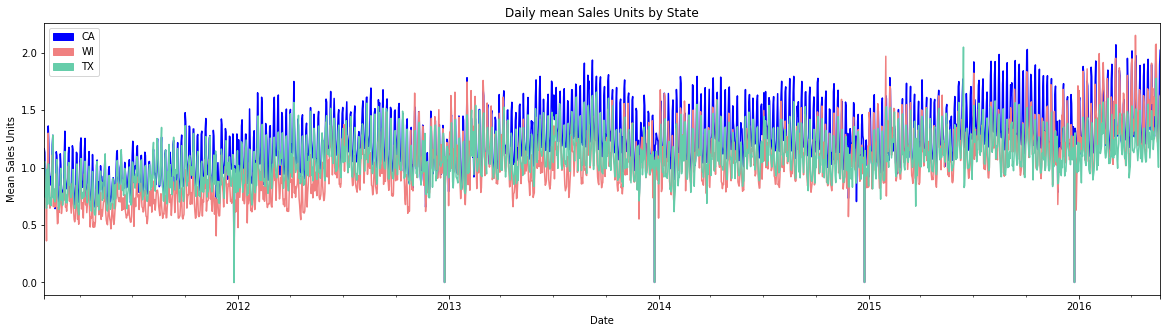

In [72]:
#Now we will look at the sales plot by states
plt.figure(figsize = (20,5))
line1 = CA_long.groupby("date")['sales_units'].mean().plot(label = "CA", color="blue")
line2 = WI_long.groupby("date")['sales_units'].mean().plot(label = "WI", color="lightcoral")
line3 = TX_long.groupby("date")['sales_units'].mean().plot(label = "TX",color="mediumaquamarine")
CA_leg = mpatches.Patch(color='blue', label='CA')
WI_leg = mpatches.Patch(color='lightcoral', label='WI')
TX_leg = mpatches.Patch(color='mediumaquamarine', label='TX')
plt.legend(handles=[CA_leg,WI_leg,TX_leg])
plt.title("Daily mean Sales Units by State")
plt.ylabel("Mean Sales Units")
plt.xlabel("Date")
plt.show()
#As you can see general trend is being followed for sales across all the years for the states but it's clearly visible 
#that the range of their sales are quite different and the pattern for each state is distinguishable from the rest

<AxesSubplot:title={'center':'Total Sales Units by Store'}, xlabel='state_id', ylabel='Total Sales Units'>

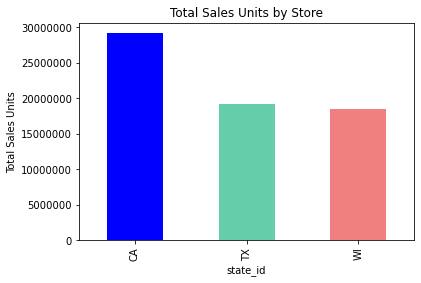

In [77]:
#Lets look at store wise total sales
plt.ticklabel_format(style = 'plain')
plt.title("Total Sales Units by Store")
plt.ylabel("Total Sales Units")
plt.xlabel("State")
long_data_cal.groupby('state_id')["sales_units"].sum().plot(kind="bar",color=["blue","mediumaquamarine","lightcoral"])

<AxesSubplot:title={'center':'Total Sales Units by Store'}, xlabel='store_id', ylabel='Total Sales Units'>

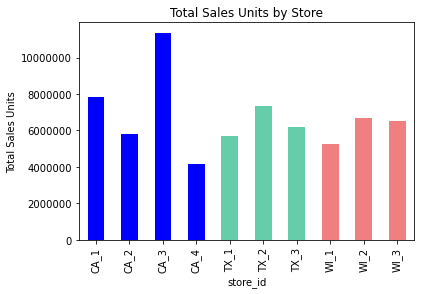

In [74]:
#Now we can look at these sales store wise within these states
plt.ticklabel_format(style = 'plain')
plt.title("Total Sales Units by Store")
plt.ylabel("Total Sales Units")
plt.xlabel("Store_id")
long_data_cal.groupby('store_id')["sales_units"].sum().plot(kind="bar", color=["blue","blue","blue","blue","mediumaquamarine","mediumaquamarine","mediumaquamarine","lightcoral","lightcoral","lightcoral"])


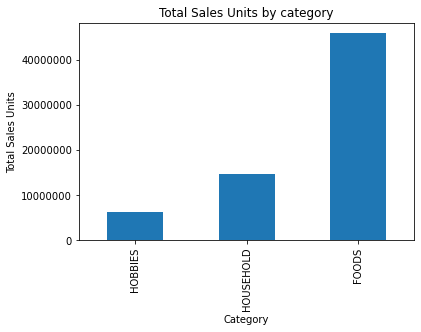

In [91]:
# Now, we will look at how sales vary across categories of products
plt.title("Total Sales Units by category")
plt.ylabel("Total Sales Units")
plt.ticklabel_format(style = 'plain')
long_data_cal.groupby('cat_id')["sales_units"].sum().plot(kind="bar")
plt.xlabel("Category")
plt.show()

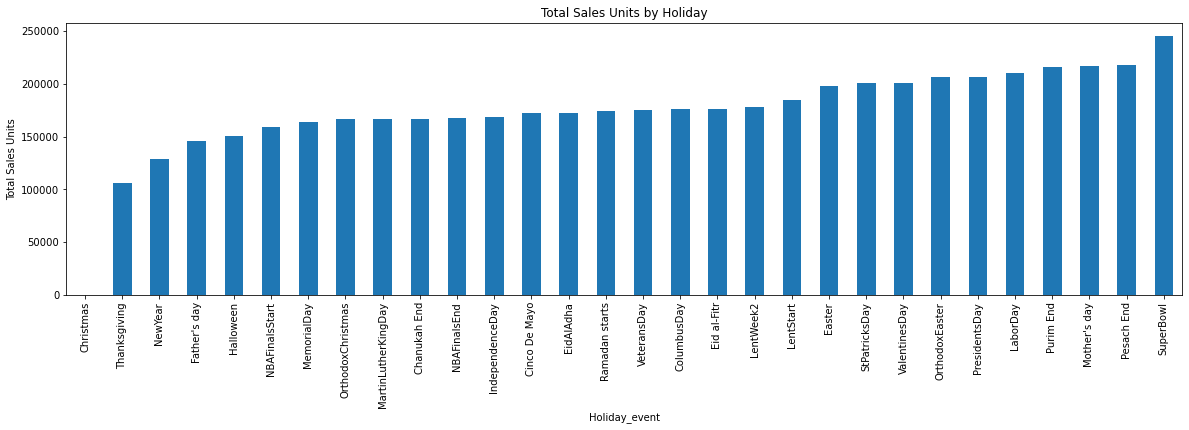

In [101]:
# We will look at Total sales units by holidays to capture in most important holidays as features that skew the sales
#the most
plt.figure(figsize = (20,5))
plt.title("Total Sales Units by Holiday")
plt.ylabel("Total Sales Units")
long_data_cal.groupby('event_name_1')["sales_units"].sum().sort_values().plot(kind="bar")
plt.xlabel("Holiday_event")
plt.show()
#Christmas sales are 0 as walmart is closed on christmas day which is quite interesting to factor

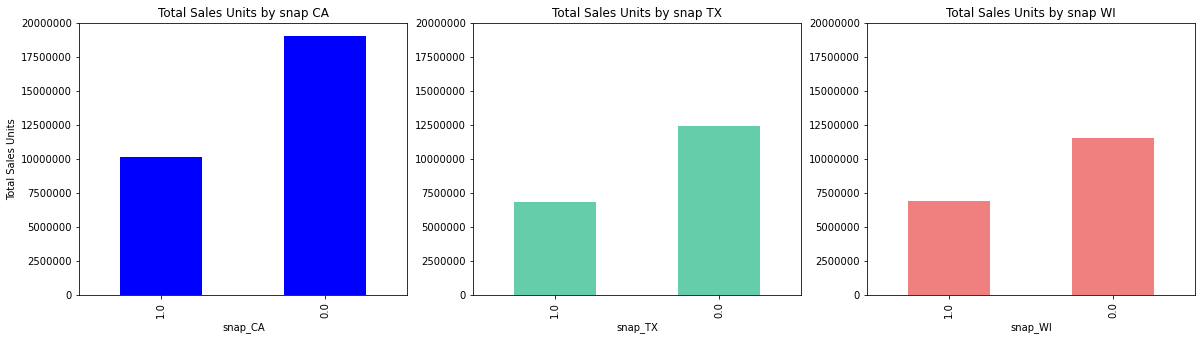

In [111]:
#We will now explore how snap_program actually create a difference for units sold
#Plots across states for snap program 
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.title("Total Sales Units by snap CA")
plt.ylabel("Total Sales Units")
plt.ticklabel_format(style = 'plain')
CA_long.groupby('snap_CA')["sales_units"].sum().sort_values().plot(kind="bar",color=["blue"])
plt.xlabel("snap_CA")
plt.ylim(0,20000000)
plt.subplot(1,3,2)
plt.title("Total Sales Units by snap TX")
plt.ticklabel_format(style = 'plain')
TX_long.groupby('snap_TX')["sales_units"].sum().sort_values().plot(kind="bar",color=["mediumaquamarine"])
plt.xlabel("snap_TX")
plt.ylim(0,20000000)
plt.subplot(1,3,3)
plt.title("Total Sales Units by snap WI")
plt.ticklabel_format(style = 'plain')
WI_long.groupby('snap_WI')["sales_units"].sum().sort_values().plot(kind="bar",color=["lightcoral"])
plt.xlabel("snap_WI")
plt.ylim(0,20000000)
plt.show()